In [2]:
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
COLUMNS = ['symbol', 'date', 'time', 'open', 'high', 'low', 'close', 'volume',
           'open_interest', 'turn_over', 'last', 'average', 'settle',
           'pre_close', 'pre_settle', 'pre_open_interest',
           'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']

In [4]:
df = pd.read_csv('./data/Tickericker.csv')
df.columns = COLUMNS
# df.index = df['time']
# df.drop(columns='time', inplace=True)
df.head()

,symbol,date,time,open,high,low,close,volume,open_interest,turn_over,last,average,settle,pre_close,pre_settle,pre_open_interest,ask1_price,ask1_volume,bid1_price,bid1_volume
0,RB2210.SHF,20220610,19:26:19.500,4776.0,4806.0,4741.0,4778.0,1160084,1871725.0,0.0,4778.0,47770.3,0.0,4791.0,4793.0,1836549.0,4779.0,184,4778.0,77
1,RB2210.SHF,20220610,19:26:20.000,4776.0,4806.0,4741.0,4778.0,1160084,1871725.0,0.0,4778.0,47770.3,0.0,4791.0,4793.0,1836549.0,4779.0,246,4778.0,87
2,RB2210.SHF,20220610,19:26:20.500,4776.0,4806.0,4741.0,4778.0,1160086,1871727.0,0.0,4778.0,47770.3,0.0,4791.0,4793.0,1836549.0,4779.0,249,4778.0,77
3,RB2210.SHF,20220610,19:26:21.000,4776.0,4806.0,4741.0,4779.0,1160088,1871728.0,0.0,4779.0,47770.3,0.0,4791.0,4793.0,1836549.0,4779.0,247,4778.0,56
4,RB2210.SHF,20220610,19:26:21.500,4776.0,4806.0,4741.0,4779.0,1160089,1871729.0,0.0,4779.0,47770.3,0.0,4791.0,4793.0,1836549.0,4779.0,247,4778.0,56


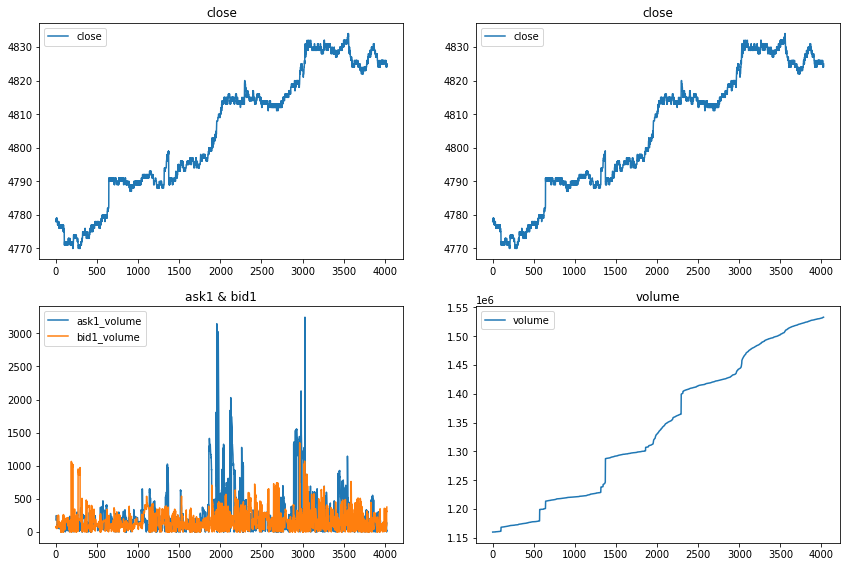

In [52]:
# 整个图的大小
plt.figure(figsize=(30, 20))

# 将整个图分成 4*4 个格子，坐标从 0,0 算起
top1 = plt.subplot2grid((4, 4), (0, 0))
top1.plot(df['close'], label='close')
plt.title('close')
plt.legend(loc=2)

top2 = plt.subplot2grid((4, 4), (0, 1))
top2.plot(df['close'], label='close')
plt.title('close')
plt.legend(loc=2)

# 将整个图分成 4*4 个格子，坐标从 1,0 算起
buttom1 = plt.subplot2grid((4, 4), (1, 0))
buttom1.plot(df['ask1_volume'], label='ask1_volume')
buttom1.plot(df['bid1_volume'], label='bid1_volume')
plt.title('ask1 & bid1')
plt.legend(loc=2)

# 将整个图分成 4*4 个格子，坐标从 1,0 算起
buttom2 = plt.subplot2grid((4, 4), (1, 1))
buttom2.plot(df['volume'], label='volume')
plt.title('volume')
plt.legend(loc=2)

# 子图之间的水平间距
plt.subplots_adjust(hspace=0.2)
plt.show();

In [6]:
# 数据探查
df2 = df[['open', 'high', 'low', 'close', 'volume', 'average', 'ask1_volume', 'bid1_volume']]
df2.head()

,open,high,low,close,volume,average,ask1_volume,bid1_volume
0,4776.0,4806.0,4741.0,4778.0,1160084,47770.3,184,77
1,4776.0,4806.0,4741.0,4778.0,1160084,47770.3,246,87
2,4776.0,4806.0,4741.0,4778.0,1160086,47770.3,249,77
3,4776.0,4806.0,4741.0,4779.0,1160088,47770.3,247,56
4,4776.0,4806.0,4741.0,4779.0,1160089,47770.3,247,56


In [28]:
def display_pct(df):
    plt.figure(figsize=(30, 20))
    p1 = plt.subplot2grid((4, 4), (0, 0))
    p1.plot(df[['close']], label='close')
    plt.title('close')

    p2 = plt.subplot2grid((4, 4), (0, 1))
    p2.plot(df[['volume']], label='volume')
    plt.title('volume')

    p3 = plt.subplot2grid((4, 4), (1, 0))
    p3.plot(df[['ask1_volume']], label='ask1_volume')
    plt.title('ask1_volume')

    p4 = plt.subplot2grid((4, 4), (1, 1))
    p4.plot(df[['bid1_volume']], label='bid1_volume')
    plt.title('bid1_volume')

    plt.subplots_adjust(hspace=0.2)

In [8]:
# percent change
df3 = df2.pct_change(periods=1)
df3.head()

,open,high,low,close,volume,average,ask1_volume,bid1_volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.336957,0.129870
2,0.0,0.0,0.0,0.000000,1.724013e-06,0.0,0.012195,-0.114943
3,0.0,0.0,0.0,0.000209,1.724010e-06,0.0,-0.008032,-0.272727
4,0.0,0.0,0.0,0.000000,8.620036e-07,0.0,0.000000,0.000000


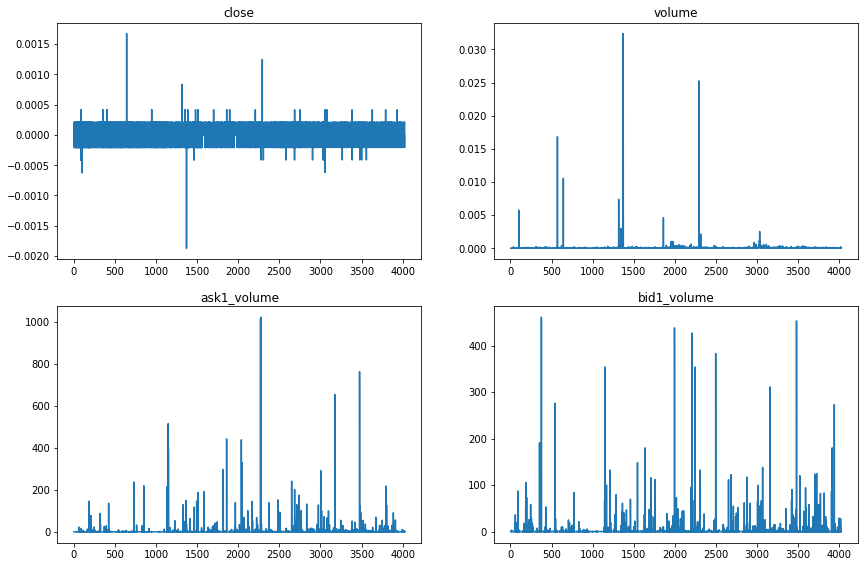

In [29]:
display_pct(df3)

In [39]:
df4 = df2.pct_change(periods=2)
# percent change
df5 = pd.concat([df2[['volume', 'ask1_volume', 'bid1_volume']], 
                 df3[['volume', 'ask1_volume', 'bid1_volume']],
                 df4[['volume', 'ask1_volume', 'bid1_volume']]],
               axis=1)
df5.head()

,volume,ask1_volume,bid1_volume,volume,ask1_volume,bid1_volume,volume,ask1_volume,bid1_volume
0,1160084,184,77,NaN,NaN,NaN,NaN,NaN,NaN
1,1160084,246,87,0.000000e+00,0.336957,0.129870,NaN,NaN,NaN
2,1160086,249,77,1.724013e-06,0.012195,-0.114943,0.000002,0.353261,0.000000
3,1160088,247,56,1.724010e-06,-0.008032,-0.272727,0.000003,0.004065,-0.356322
4,1160089,247,56,8.620036e-07,0.000000,0.000000,0.000003,-0.008032,-0.272727


In [40]:
# 计算 ask1_volume pct_change
print((246 - 184) / 184)
print((249 - 246) / 246)
print((247 - 249) / 249)

# 
print((249 - 184) / 184)

0.33695652173913043
0.012195121951219513
-0.008032128514056224
0.3532608695652174


In [42]:
df3_1 = df2.diff(periods=1)
df3_1.head()

,open,high,low,close,volume,average,ask1_volume,bid1_volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,62.0,10.0
2,0.0,0.0,0.0,0.0,2.0,0.0,3.0,-10.0
3,0.0,0.0,0.0,1.0,2.0,0.0,-2.0,-21.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
df4_1 = df2.diff(periods=2)
df4_1.head()

,open,high,low,close,volume,average,ask1_volume,bid1_volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,2.0,0.0,65.0,0.0
3,0.0,0.0,0.0,1.0,4.0,0.0,1.0,-31.0
4,0.0,0.0,0.0,1.0,3.0,0.0,-2.0,-21.0


In [54]:
df5_1 = pd.concat([df2[['volume', 'ask1_volume', 'bid1_volume']], 
                   df3_1[['volume', 'ask1_volume', 'bid1_volume']],
                   df4_1[['volume', 'ask1_volume', 'bid1_volume']]],
               axis=1)
df5_1.head()

,volume,ask1_volume,bid1_volume,volume,ask1_volume,bid1_volume,volume,ask1_volume,bid1_volume
0,1160084,184,77,NaN,NaN,NaN,NaN,NaN,NaN
1,1160084,246,87,0.0,62.0,10.0,NaN,NaN,NaN
2,1160086,249,77,2.0,3.0,-10.0,2.0,65.0,0.0
3,1160088,247,56,2.0,-2.0,-21.0,4.0,1.0,-31.0
4,1160089,247,56,1.0,0.0,0.0,3.0,-2.0,-21.0
